# 1. Basic Stats:

H0 : There is no difference in loneliness scores between individuals who play online games frequently with friends and those who do not.
T-test results: t-statistic = -0.5250241450708119, p-value = 0.5997880617781706

Descriptive Statistics:
             Group  Mean Loneliness  Std Loneliness  Sample Size
0  Frequent Gamers         3.701342        1.666080          298
1       Non-Gamers         3.779923        1.841022          259


<Figure size 1000x600 with 0 Axes>

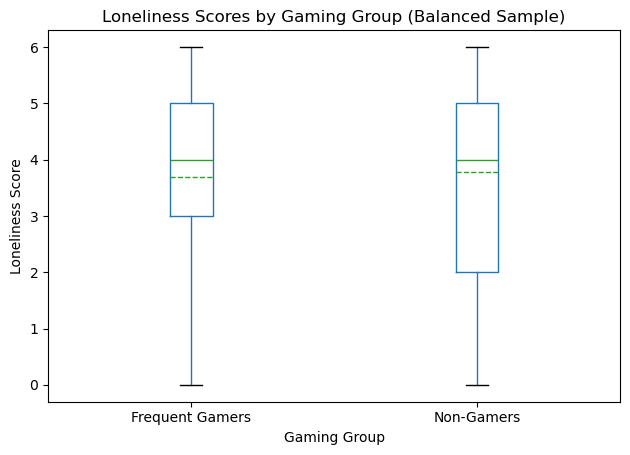

In [39]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import ttest_ind

# Load the dataset
file_path = 'https://raw.githubusercontent.com/pointOfive/stat130chat130/refs/heads/main/CP/CSCS_data_anon.csv'
data = pd.read_csv(file_path, low_memory=False)

# Extract relevant columns and create a copy of the subset
relevant_columns = [
    'CONNECTION_activities_onlinegames_p3m', 
    'LONELY_ucla_loneliness_scale_left_out', 
    'LONELY_dejong_emotional_social_loneliness_scale_score',
    'CONNECTION_activities_talked_family_p3m',
    'CONNECTION_activities_talked_hobbies_p3m'
]
subset_data = data[relevant_columns].copy()  # Create a deep copy to avoid warnings

# Clean and categorize the "Online Social Gaming" variable using .loc
subset_data['gaming_category'] = subset_data['CONNECTION_activities_onlinegames_p3m'].apply(
    lambda x: 'Frequent Gamers' if x in ['Daily', 'A few times a week'] else 'Non-Gamers'
)

# Filter data by gaming category
frequent_gamers = subset_data[subset_data['gaming_category'] == 'Frequent Gamers']
non_gamers = subset_data[subset_data['gaming_category'] == 'Non-Gamers']

# Balance sample sizes
min_size = min(len(frequent_gamers), len(non_gamers))
frequent_gamers_sample = frequent_gamers.sample(n=min_size, random_state=42)
non_gamers_sample = non_gamers.sample(n=min_size, random_state=42)

# Combine balanced groups
balanced_data = pd.concat([frequent_gamers_sample, non_gamers_sample])

# Perform analysis on balanced data
frequent_gamers_loneliness = balanced_data[balanced_data['gaming_category'] == 'Frequent Gamers']['LONELY_dejong_emotional_social_loneliness_scale_score'].dropna()
non_gamers_loneliness = balanced_data[balanced_data['gaming_category'] == 'Non-Gamers']['LONELY_dejong_emotional_social_loneliness_scale_score'].dropna()

# Descriptive statistics
descriptive_stats = {
    "Group": ["Frequent Gamers", "Non-Gamers"],
    "Mean Loneliness": [frequent_gamers_loneliness.mean(), non_gamers_loneliness.mean()],
    "Std Loneliness": [frequent_gamers_loneliness.std(), non_gamers_loneliness.std()],
    "Sample Size": [len(frequent_gamers_loneliness), len(non_gamers_loneliness)],
}

descriptive_stats_df = pd.DataFrame(descriptive_stats)

# Perform t-test
t_stat, p_value = ttest_ind(frequent_gamers_loneliness, non_gamers_loneliness, equal_var=False)

# Print t-test results and descriptive stats
print("H0 : There is no difference in loneliness scores between individuals who play online games frequently with friends and those who do not.")
print(f"T-test results: t-statistic = {t_stat}, p-value = {p_value}")
print("\nDescriptive Statistics:")
print(descriptive_stats_df)

# Create a box plot for the loneliness scores by gaming group
plt.figure(figsize=(10, 6))
balanced_data.boxplot(
    column='LONELY_dejong_emotional_social_loneliness_scale_score',
    by='gaming_category',
    grid=False,
    showmeans=True,
    meanline=True
)

# Enhance plot aesthetics
plt.title('Loneliness Scores by Gaming Group (Balanced Sample)')
plt.suptitle('')  # Remove the automatic subplot title
plt.xlabel('Gaming Group')
plt.ylabel('Loneliness Score')
plt.xticks(rotation=0)
plt.tight_layout()

# Display the plot
plt.show()

In [40]:
# Calculate additional descriptive statistics for each group
frequent_gamers_stats = {
    'Group': 'Frequent Gamers',
    'Mean': frequent_gamers_loneliness.mean(),
    'Median': frequent_gamers_loneliness.median(),
    'Mode': frequent_gamers_loneliness.mode().iloc[0] if not frequent_gamers_loneliness.mode().empty else None,
    'Std Dev': frequent_gamers_loneliness.std(),
    'IQR': frequent_gamers_loneliness.quantile(0.75) - frequent_gamers_loneliness.quantile(0.25),
    'Sample Size': len(frequent_gamers_loneliness)
}

non_gamers_stats = {
    'Group': 'Non-Gamers',
    'Mean': non_gamers_loneliness.mean(),
    'Median': non_gamers_loneliness.median(),
    'Mode': non_gamers_loneliness.mode().iloc[0] if not non_gamers_loneliness.mode().empty else None,
    'Std Dev': non_gamers_loneliness.std(),
    'IQR': non_gamers_loneliness.quantile(0.75) - non_gamers_loneliness.quantile(0.25),
    'Sample Size': len(non_gamers_loneliness)
}

# Combine statistics into a DataFrame
additional_stats_df = pd.DataFrame([frequent_gamers_stats, non_gamers_stats])

# Display the results
print(additional_stats_df)


             Group      Mean  Median  Mode   Std Dev  IQR  Sample Size
0  Frequent Gamers  3.701342     4.0   3.0  1.666080  2.0          298
1       Non-Gamers  3.779923     4.0   6.0  1.841022  3.0          259


# 2. Bar Graph directly comparing the two groups

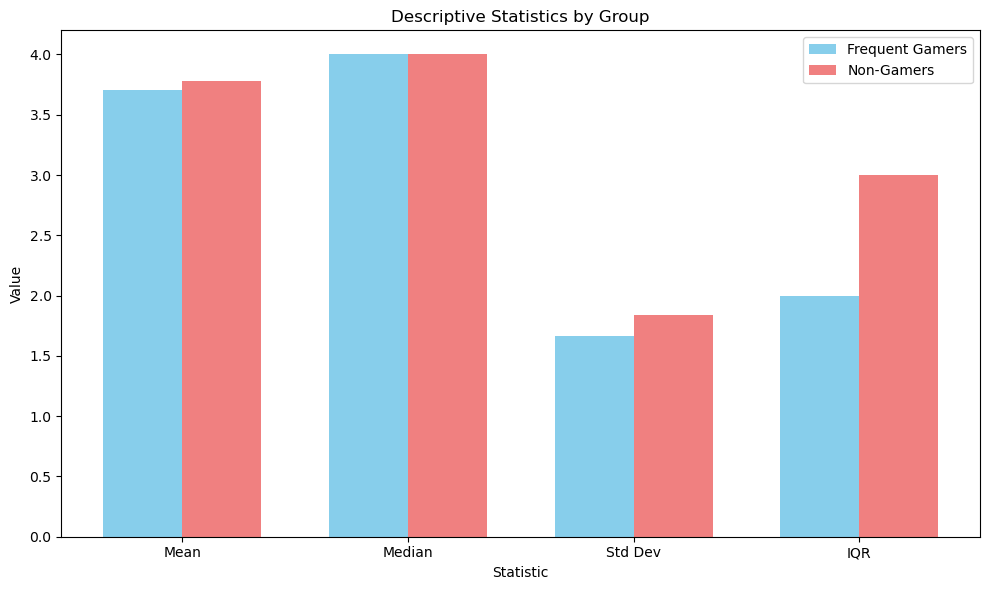

In [41]:
import matplotlib.pyplot as plt

# Set up the data for plotting
categories = ['Mean', 'Median', 'Std Dev', 'IQR']
frequent_gamers_values = [
    frequent_gamers_stats['Mean'],
    frequent_gamers_stats['Median'],
    frequent_gamers_stats['Std Dev'],
    frequent_gamers_stats['IQR'],
]
non_gamers_values = [
    non_gamers_stats['Mean'],
    non_gamers_stats['Median'],
    non_gamers_stats['Std Dev'],
    non_gamers_stats['IQR'],
]

# Create a grouped bar chart
x = range(len(categories))
width = 0.35  # Width of bars

plt.figure(figsize=(10, 6))
plt.bar(x, frequent_gamers_values, width, label='Frequent Gamers', color='skyblue')
plt.bar([p + width for p in x], non_gamers_values, width, label='Non-Gamers', color='lightcoral')

# Add labels and legend
plt.xticks([p + width / 2 for p in x], categories)
plt.title('Descriptive Statistics by Group')
plt.ylabel('Value')
plt.xlabel('Statistic')
plt.legend()
plt.tight_layout()
plt.show()


# 3. ANOVA Test

In [42]:
from scipy.stats import f_oneway

# Perform one-way ANOVA
anova_result = f_oneway(frequent_gamers_loneliness, non_gamers_loneliness)

# Print the results
print("H0: The means of loneliness scores are the same across all groups.")
print(f"ANOVA results: F-statistic = {anova_result.statistic}, p-value = {anova_result.pvalue}")

# Interpret the result
alpha = 0.05
if anova_result.pvalue < alpha:
    print("Conclusion: Reject the null hypothesis. There is a significant difference in the loneliness scores between the groups.")
else:
    print("Conclusion: Fail to reject the null hypothesis. There is no significant difference in the loneliness scores between the groups.")


H0: The means of loneliness scores are the same across all groups.
ANOVA results: F-statistic = 0.2795258192381175, p-value = 0.5972235408398117
Conclusion: Fail to reject the null hypothesis. There is no significant difference in the loneliness scores between the groups.


# Interaction and how age or gender have an effect

Index(['UNIQUE_id', 'UNIQUE_num_records', 'ELIGIBLE_consent',
       'GEO_residence_canada', 'GEO_province', 'DEMO_age', 'DEMO_gender',
       'DEMO_identity_vetrans', 'DEMO_identity_indigenous',
       'DEMO_identity_lgbtq',
       ...
       'PSYCH_body_self_image_questionnaire_height_dissatisfaction_score',
       'PSYCH_body_self_image_questionnaire_fatness_evaluation_score',
       'PSYCH_body_self_image_questionnaire_negative_affect_score',
       'PSYCH_body_self_image_questionnaire_social_dependence_score',
       'PSYCH_big_five_inventory_agreeable_score',
       'PSYCH_big_five_inventory_conscientious_score',
       'PSYCH_big_five_inventory_extraverted_score',
       'PSYCH_big_five_inventory_neurotic_score',
       'PSYCH_big_five_inventory_open_score', 'REMOVE_case'],
      dtype='object', length=1794)
Two-Way ANOVA Results:
                                                          sum_sq      df  \
C(gaming_category)                                     20.581954     1.0  

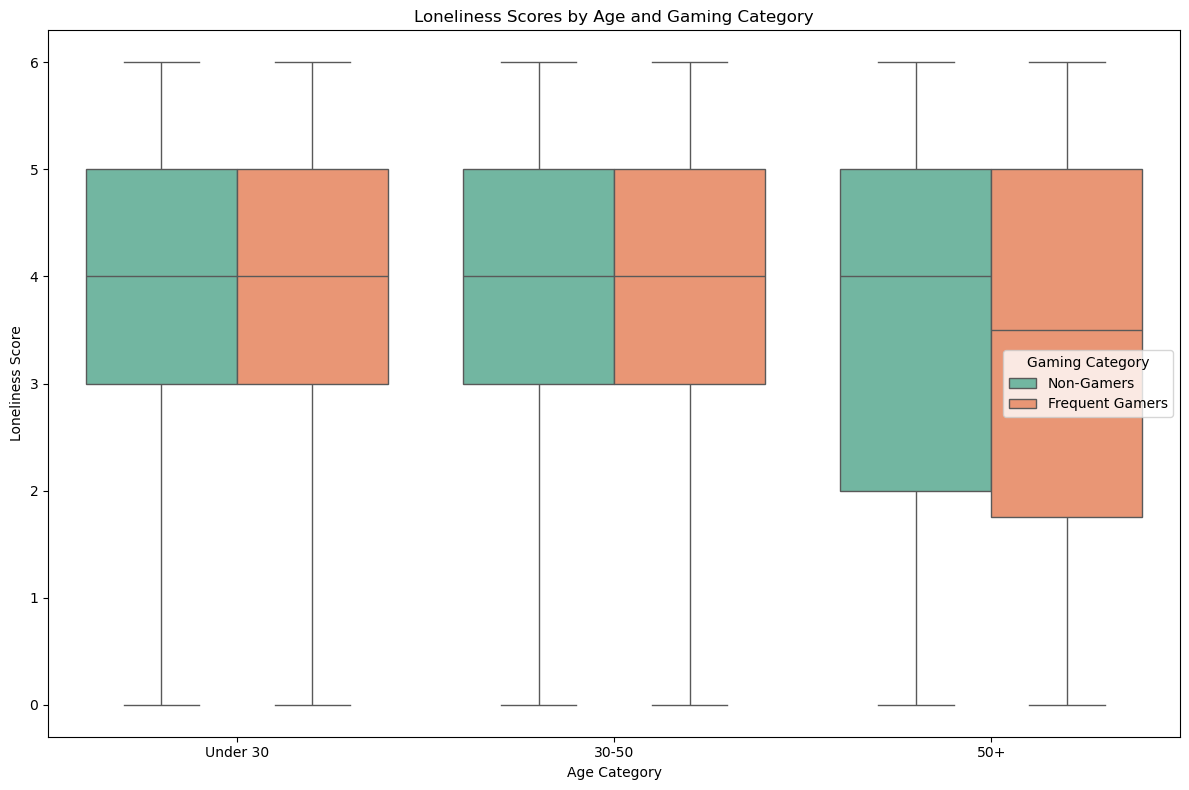

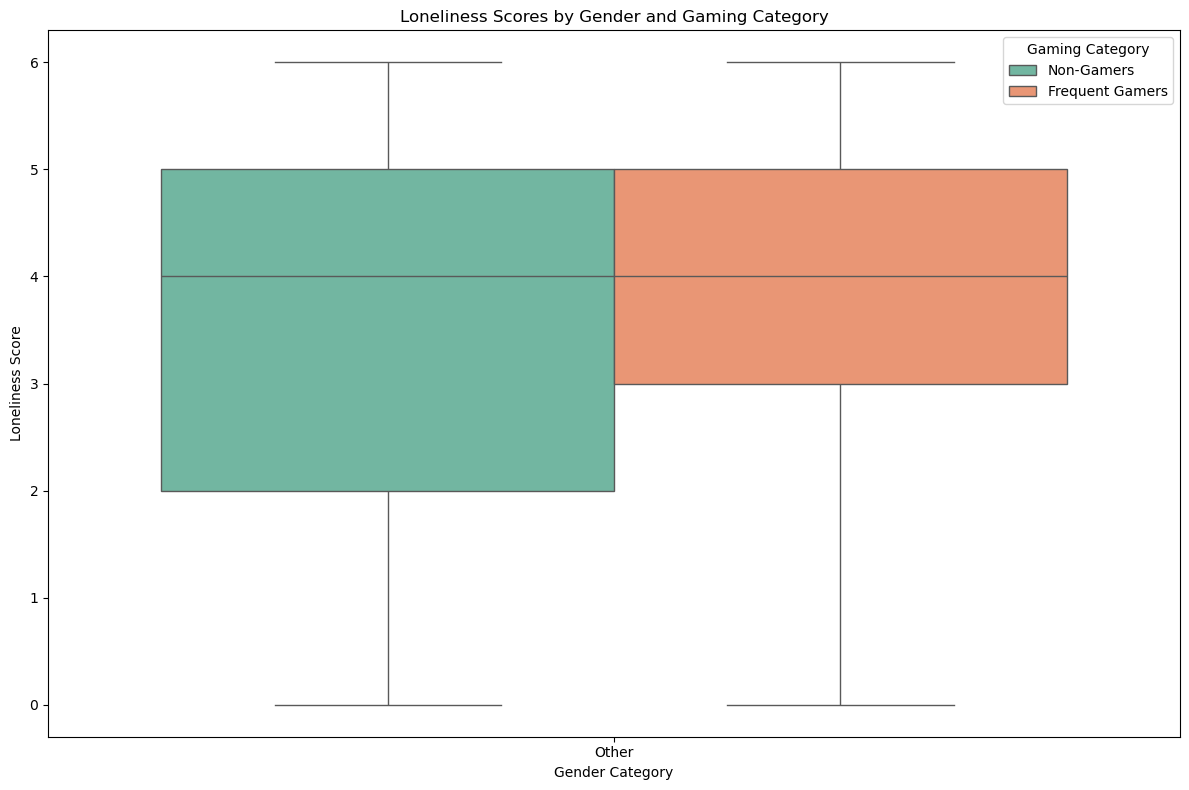

In [45]:
# Check the available columns in the dataset
print(data.columns)

# Assuming 'DEMO_age' and 'DEMO_gender' are available, we can proceed with the following steps.

# Create age categories based on 'DEMO_age' (assuming age is in years)
data['age_category'] = pd.cut(data['DEMO_age'], bins=[0, 30, 50, 100], labels=['Under 30', '30-50', '50+'])

# Create gender categories based on 'DEMO_gender' (assuming 1 represents Male, 2 represents Female, and other values represent Other)
data['gender_category'] = data['DEMO_gender'].apply(lambda x: 'Male' if x == 1 else 'Female' if x == 2 else 'Other')

# We will use the "gaming_category" for online gaming and loneliness score columns
data['gaming_category'] = data['CONNECTION_activities_onlinegames_p3m'].apply(
    lambda x: 'Frequent Gamers' if x in ['Daily', 'A few times a week'] else 'Non-Gamers'
)

# Prepare the dependent variable for loneliness score
data['loneliness_score'] = data['LONELY_dejong_emotional_social_loneliness_scale_score']

# Now, we can perform the Two-Way ANOVA analysis
import statsmodels.api as sm
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm

# Create a model for the two-way ANOVA
model = ols('loneliness_score ~ C(gaming_category) + C(age_category) + C(gender_category) + C(gaming_category):C(age_category):C(gender_category)', data=data).fit()

# Perform the ANOVA
anova_results = anova_lm(model, typ=2)

# Display the results
print("Two-Way ANOVA Results:")
print(anova_results)

# Visualizing the interaction effects with a boxplot for each factor

import seaborn as sns

# Plot the interaction of gaming category, age category, and gender category on loneliness scores
plt.figure(figsize=(12, 8))

sns.boxplot(x='age_category', y='loneliness_score', hue='gaming_category', data=data, palette='Set2')
plt.title('Loneliness Scores by Age and Gaming Category')
plt.xlabel('Age Category')
plt.ylabel('Loneliness Score')
plt.legend(title='Gaming Category')

# Show the plot
plt.tight_layout()
plt.show()

# Plot another interaction for gender category
plt.figure(figsize=(12, 8))

sns.boxplot(x='gender_category', y='loneliness_score', hue='gaming_category', data=data, palette='Set2')
plt.title('Loneliness Scores by Gender and Gaming Category')
plt.xlabel('Gender Category')
plt.ylabel('Loneliness Score')
plt.legend(title='Gaming Category')

# Show the plot
plt.tight_layout()
plt.show()


# 4. Effect Size and Practical Significance (Cohen's D)
Add measures of Cohen's d to quantify the effect size and assess practical significance.

In [50]:
import numpy as np

# Calculate pooled standard deviation
pooled_std = np.sqrt(
    (len(frequent_gamers_loneliness) - 1) * frequent_gamers_loneliness.var() + 
    (len(non_gamers_loneliness) - 1) * non_gamers_loneliness.var()
) / (len(frequent_gamers_loneliness) + len(non_gamers_loneliness) - 2)

# Calculate Cohen's d
cohens_d = (frequent_gamers_loneliness.mean() - non_gamers_loneliness.mean()) / pooled_std
print(f"Cohen's d: {cohens_d}")


Cohen's d: -1.0581007922432437
